In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(11)

In [3]:
means = [[2,2],[8,3],[3,6]]
cov = [[1,0], [0,1]]
N = 500

x0 = np.random.multivariate_normal(means[0], cov, N)
x1 = np.random.multivariate_normal(means[1], cov, N)
x2 = np.random.multivariate_normal(means[2], cov, N)

x = np.concatenate((x0,x1,x2), axis=0)
K = 3

#Array label
original_label= np.asarray([0]*N + [1]*N + [2]*N).T


3


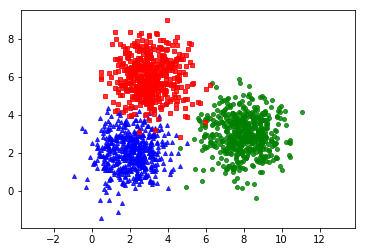

In [19]:
def kmeans_display(x, label):
    #Tìm giá trị max trong array (Số group)
    K = np.amax(label)+1
    
    x0 = x[label == 0, :]
    x1 = x[label == 1, :]
    x2 = x[label == 2, :]
    
    plt.plot(x0[:, 0], x0[:,1], 'b^', markersize = 4, alpha = .8)
    plt.plot(x1[:, 0], x1[:,1], 'go', markersize = 4, alpha = .8)
    plt.plot(x2[:, 0], x2[:,1], 'rs', markersize = 4, alpha = .8)
    
    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(x, original_label)


In [4]:
def kmeans_init_centers(X,k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centers[k,:] = np.mean(Xk, axis=0)
    return centers

def has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_center]))



In [12]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X,K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break;
        centers.append(new_centers)
        it += 1
        return (centers, labels, it)

In [11]:
(centers, labels, it) = kmeans(x,K)

NameError: name 'new_center' is not defined